In [161]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing
import sklearn as skl

In [162]:
df = pd.read_csv("Pricing_Engineered.csv")
df_x = df.drop(labels = ["Unnamed: 21","feature_1","feature_2", "feature_3", "feature_4", "feature_5", "feature_6", "feature_7", "feature_8", "price"], axis = 1)
dfjustfeatures = df[["feature_1","feature_2", "feature_3", "feature_4", "feature_5", "feature_6", "feature_7", "feature_8"]]

In [163]:
df["Age_Std"] = (df["AgeAtSale"]-df["AgeAtSale"].mean())/(df['AgeAtSale'].std())

In [164]:
df.head()
dfcont = df[['mileage','engine_power','TotalFeatures']]

In [165]:
dfcopy = df.copy()
dfcopy['mile_std'] = (dfcopy['mileage']-np.mean(dfcopy['mileage']))/(np.std(dfcopy['mileage']))
dfcopy['engine_std'] = (dfcopy['engine_power']-np.mean(dfcopy['engine_power']))/(np.std(dfcopy['engine_power']))
dfcopy['Feat_std'] = (dfcopy['TotalFeatures']-np.mean(dfcopy['TotalFeatures']))/(np.std(dfcopy['TotalFeatures']))

In [188]:
eps = [.5,1,1.5,2,2.5]
min_samps = np.linspace(5,500,10)
Results = pd.DataFrame(index = eps, columns = min_samps)
i = 0
for ep in eps:
    for sample in min_samps:
        db1 = skl.cluster.dbscan(dfcopy[['mile_std','engine_std','Feat_std']],eps = ep, min_samples = sample)
        dfcopy[i] = db1[1]
        i += 1
        

In [206]:
dfcopy[4].value_counts()

-1    4231
 0     321
 1     291
Name: 4, dtype: int64

In [154]:
Nc = range(1,10)
x = []
for i in Nc:
    kml = skl.cluster.KMeans(i, init = 'k-means++').fit(dfcopy[['mile_std','engine_std','Feat_std']]).score(dfcopy[['mile_std','engine_std','Feat_std']])
    x.append(kml)

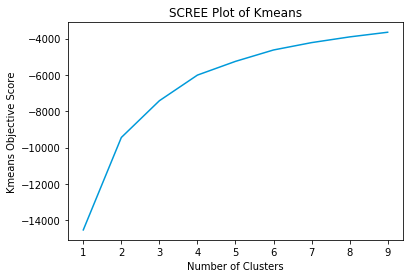

In [207]:
plt.plot(Nc,x, color = "#009ADA")
plt.xlabel("Number of Clusters")
plt.ylabel("Kmeans Objective Score")
plt.title("SCREE Plot of Kmeans")
plt.show()

In [172]:
kml = skl.cluster.KMeans(4, init = 'k-means++').fit(dfcopy[['mile_std','engine_std','Feat_std']])
dfcopy['kmeans'] = kml.labels_

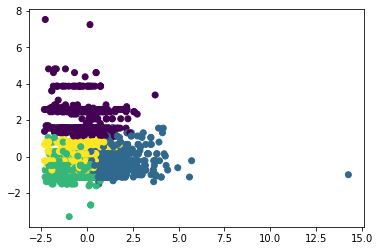

In [183]:
plt.scatter(dfcopy['mile_std'],dfcopy['engine_std'], c = dfcopy['kmeans'])

In [141]:
((dfcopy['mileage']-np.mean(dfcopy['mileage'])/np.std(dfcopy['mileage'])))

NameError: name 'mean' is not defined

In [144]:
(dfcopy['mileage']-np.mean(dfcopy['mileage']))/(np.std(dfcopy['mileage']))

0      -0.009168
1      -2.110528
2       0.703337
3      -0.214781
4      -0.728782
          ...   
4838   -1.681657
4839   -1.514039
4840   -2.015762
4841   -1.878083
4842    0.911725
Name: mileage, Length: 4843, dtype: float64